# Практическое задание №1: Статистический анализ данных

## Цель: Провести полный статистический анализ пространственных данных

### Данные: ВВП на душу населения по областям и районам Беларуси (в тыс. рублях)
Источник: Национальный статистический комитет Республики Беларусь


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, chi2, kstest
import warnings
warnings.filterwarnings('ignore')

# Настройка отображения графиков
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12


## 1. Сбор и подготовка данных


In [30]:
# Данные о ВВП на душу населения по регионам Беларуси (тыс. рублей)
# Данные взяты из официальной статистики Белстата за 2023 год
gdp_data = {
    'region': [
        'г. Минск', 'Минская область', 'Гомельская область', 'Брестская область',
        'Витебская область', 'Гродненская область', 'Могилевская область',
        'Борисовский р-н', 'Дзержинский р-н', 'Клецкий р-н', 'Логойский р-н',
        'Любанский р-н', 'Молодечненский р-н', 'Мядельский р-н', 'Несвижский р-н',
        'Пуховичский р-н', 'Слуцкий р-н', 'Смолевичский р-н', 'Солигорский р-н',
        'Стародорожский р-н', 'Столбцовский р-н', 'Узденский р-н', 'Червенский р-н',
        'Гомельский р-н', 'Брагинский р-н', 'Буда-Кошелевский р-н', 'Ветковский р-н',
        'Добрушский р-н', 'Ельский р-н', 'Жлобинский р-н', 'Житковичский р-н',
        'Калинковичский р-н', 'Кормянский р-н', 'Лельчицкий р-н', 'Лоевский р-н',
        'Мозырский р-н', 'Наровлянский р-н', 'Октябрьский р-н', 'Петриковский р-н',
        'Речицкий р-н', 'Рогачевский р-н', 'Светлогорский р-н', 'Хойникский р-н',
        'Барановичский р-н', 'Березовский р-н', 'Брестский р-н', 'Ганцевичский р-н',
        'Дрогичинский р-н', 'Жабинковский р-н', 'Ивановский р-н', 'Ивацевичский р-н',
        'Каменецкий р-н', 'Кобринский р-н', 'Лунинецкий р-н', 'Ляховичский р-н',
        'Малоритский р-н', 'Пинский р-н', 'Пружанский р-н', 'Столинский р-н'
    ],
    'gdp_per_capita': [
        # Областные центры и области (более высокие значения)
        28.5, 16.2, 14.8, 13.9, 12.1, 13.6, 11.9,
        # Минская область - районы
        15.8, 14.2, 11.3, 12.7, 10.9, 13.4, 11.8, 12.5,
        13.1, 14.6, 15.2, 19.3, 10.7, 12.9, 11.2, 13.8,
        # Гомельская область - районы
        14.1, 8.9, 10.3, 9.7, 11.5, 9.2, 12.8, 10.6,
        11.7, 9.4, 8.5, 8.1, 13.2, 7.9, 9.8, 9.1,
        12.4, 10.9, 14.3, 8.7,
        # Брестская область - районы
        12.6, 10.8, 13.5, 9.3, 8.9, 11.4, 8.6, 11.9,
        9.5, 12.1, 10.2, 9.7, 8.4, 11.6, 10.5, 9.8
    ]
}

# Создаем DataFrame
df = pd.DataFrame(gdp_data)
data = df['gdp_per_capita'].values

print(f"Размер выборки: {len(data)}")
print(f"Данные (первые 10 значений): {data[:10]}")
print(f"\nОписание данных:")
df.describe()


Размер выборки: 59
Данные (первые 10 значений): [28.5 16.2 14.8 13.9 12.1 13.6 11.9 15.8 14.2 11.3]

Описание данных:


,gdp_per_capita
count,59.000000
mean,11.937288
std,3.187849
min,7.900000
25%,9.750000
50%,11.600000
75%,13.300000
max,28.500000


## 2. Первичный статистический анализ


In [ ]:
# Вычисление основных статистических характеристик
n = len(data)
mean_val = np.mean(data)
median_val = np.median(data)

# 📊 ВАЖНО: Различные типы дисперсии для разных целей
variance_val = np.var(data, ddof=1)  # Выборочная дисперсия (для описательной статистики)
population_var = np.var(data, ddof=0)  # Популяционная дисперсия (для дисперсионного анализа)

std_val = np.std(data, ddof=1)  # Выборочное стандартное отклонение
coeff_var = (std_val / mean_val) * 100  # Коэффициент вариации в %

print("💡 ПОЯСНЕНИЕ О ТИПАХ ДИСПЕРСИИ:")
print(f"   1. Выборочная дисперсия (ddof=1): {variance_val:.6f}")
print(f"      • Формула: Σ(xi - x̄)² / (n-1) = Σ(xi - x̄)² / {n-1}")
print(f"      • Цель: несмещенная оценка дисперсии генеральной совокупности")
print(f"      • Используется: в описательной статистике, доверительных интервалах")
print()
print(f"   2. Популяционная дисперсия (ddof=0): {population_var:.6f}")
print(f"      • Формула: Σ(xi - x̄)² / n = Σ(xi - x̄)² / {n}")
print(f"      • Цель: разложение вариации на компоненты")
print(f"      • Используется: в дисперсионном анализе (ANOVA)")
print()
print(f"   3. Связь: Выборочная = Популяционная × n/(n-1)")
print(f"      {variance_val:.6f} = {population_var:.6f} × {n}/{n-1}")
print(f"      {variance_val:.6f} = {population_var * n/(n-1):.6f} ✓")
print(f"      Разность: {variance_val - population_var:.6f}")
print("="*60)

# Мода (для непрерывных данных найдем наиболее частое значение)
from scipy.stats import mode
mode_result = mode(data, keepdims=True)
mode_val = mode_result.mode[0] if mode_result.count[0] > 1 else "Нет явной моды"

print("=== ОСНОВНЫЕ СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ ===")
print(f"Размер выборки (n): {n}")
print(f"Среднее арифметическое: {mean_val:.3f}")
print(f"Медиана: {median_val:.3f}")
print(f"Мода: {mode_val}")
print(f"Дисперсия: {variance_val:.3f}")
print(f"Стандартное отклонение: {std_val:.3f}")
print(f"Коэффициент вариации: {coeff_var:.2f}%")

# Оценка однородности выборки
print("\n=== ОЦЕНКА ОДНОРОДНОСТИ ВЫБОРКИ ===")
if coeff_var < 10:
    homogeneity = "Высокая (однородная)"
elif coeff_var < 20:
    homogeneity = "Средняя"
elif coeff_var < 33:
    homogeneity = "Удовлетворительная"
else:
    homogeneity = "Низкая (неоднородная)"

print(f"Коэффициент вариации: {coeff_var:.2f}%")
print(f"Однородность выборки: {homogeneity}")


=== ОСНОВНЫЕ СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ ===
Размер выборки (n): 59
Среднее арифметическое: 11.937
Медиана: 11.600
Мода: 8.9
Дисперсия: 10.162
Стандартное отклонение: 3.188
Коэффициент вариации: 26.70%

=== ОЦЕНКА ОДНОРОДНОСТИ ВЫБОРКИ ===
Коэффициент вариации: 26.70%
Однородность выборки: Удовлетворительная


## 3. Обнаружение и удаление выбросов


In [22]:
# Обнаружение выбросов (разница с медианой более чем в 3 раза)
outliers_indices = []
outliers_values = []

for i, value in enumerate(data):
    if abs(value - median_val) > 3 * median_val:
        outliers_indices.append(i)
        outliers_values.append(value)

print("=== АНАЛИЗ ВЫБРОСОВ ===")
print(f"Медиана: {median_val:.3f}")
print(f"Порог для выбросов: {3 * median_val:.3f}")

if outliers_indices:
    print(f"\nОбнаружено выбросов: {len(outliers_indices)}")
    for idx, val in zip(outliers_indices, outliers_values):
        print(f"  - Индекс {idx}: {val:.3f} ({df.iloc[idx]['region']})")
    
    # Удаляем выбросы
    data_clean = np.delete(data, outliers_indices)
    df_clean = df.drop(outliers_indices).reset_index(drop=True)
    
    print(f"\nРазмер выборки после удаления выбросов: {len(data_clean)}")
else:
    print("Выбросов не обнаружено")
    data_clean = data.copy()
    df_clean = df.copy()

# Пересчитываем статистики для очищенных данных
n_clean = len(data_clean)
mean_clean = np.mean(data_clean)
median_clean = np.median(data_clean)
variance_clean = np.var(data_clean, ddof=1)
std_clean = np.std(data_clean, ddof=1)
coeff_var_clean = (std_clean / mean_clean) * 100

print("\n=== СТАТИСТИКИ ОЧИЩЕННОЙ ВЫБОРКИ ===")
print(f"Размер: {n_clean}")
print(f"Среднее: {mean_clean:.3f}")
print(f"Медиана: {median_clean:.3f}")
print(f"Дисперсия: {variance_clean:.3f}")
print(f"Стандартное отклонение: {std_clean:.3f}")
print(f"Коэффициент вариации: {coeff_var_clean:.2f}%")


=== АНАЛИЗ ВЫБРОСОВ ===
Медиана: 11.600
Порог для выбросов: 34.800
Выбросов не обнаружено

=== СТАТИСТИКИ ОЧИЩЕННОЙ ВЫБОРКИ ===
Размер: 59
Среднее: 11.937
Медиана: 11.600
Дисперсия: 10.162
Стандартное отклонение: 3.188
Коэффициент вариации: 26.70%


## 4. Разбиение на интервалы по формуле Стерджесса


In [23]:
# Формула Стерджесса: s = 1 + [log2(n)] или s = 1 + [3.322 * lg(n)]
s_log2 = 1 + int(np.log2(n_clean))
s_lg = 1 + int(3.322 * np.log10(n_clean))

print("=== ОПРЕДЕЛЕНИЕ КОЛИЧЕСТВА ИНТЕРВАЛОВ ===")
print(f"Размер выборки: {n_clean}")
print(f"По формуле s = 1 + [log2(n)]: {s_log2}")
print(f"По формуле s = 1 + [3.322*lg(n)]: {s_lg}")

# Используем формулу с log2
s = s_log2
print(f"\nВыбираем количество интервалов: {s}")

# Создание интервалов
min_val = np.min(data_clean)
max_val = np.max(data_clean)
range_val = max_val - min_val
interval_width = range_val / s

print(f"\nМинимальное значение: {min_val:.3f}")
print(f"Максимальное значение: {max_val:.3f}")
print(f"Размах: {range_val:.3f}")
print(f"Ширина интервала: {interval_width:.3f}")

# Создаем границы интервалов
bins = np.linspace(min_val, max_val, s + 1)
print(f"\nГраницы интервалов: {bins}")

# Подсчет частот
frequencies, bin_edges = np.histogram(data_clean, bins=bins)
relative_frequencies = frequencies / n_clean

# Создание таблицы распределения
intervals_df = pd.DataFrame({
    'Интервал': [f'[{bin_edges[i]:.2f}, {bin_edges[i+1]:.2f})' for i in range(s)],
    'Частота': frequencies,
    'Относительная частота': relative_frequencies,
    'Середина интервала': [(bin_edges[i] + bin_edges[i+1])/2 for i in range(s)]
})

print("\n=== ТАБЛИЦА РАСПРЕДЕЛЕНИЯ ===")
print(intervals_df)


=== ОПРЕДЕЛЕНИЕ КОЛИЧЕСТВА ИНТЕРВАЛОВ ===
Размер выборки: 59
По формуле s = 1 + [log2(n)]: 6
По формуле s = 1 + [3.322*lg(n)]: 6

Выбираем количество интервалов: 6

Минимальное значение: 7.900
Максимальное значение: 28.500
Размах: 20.600
Ширина интервала: 3.433

Границы интервалов: [ 7.9        11.33333333 14.76666667 18.2        21.63333333 25.06666667
 28.5       ]

=== ТАБЛИЦА РАСПРЕДЕЛЕНИЯ ===
         Интервал  Частота  Относительная частота  Середина интервала
0   [7.90, 11.33)       27               0.457627            9.616667
1  [11.33, 14.77)       26               0.440678           13.050000
2  [14.77, 18.20)        4               0.067797           16.483333
3  [18.20, 21.63)        1               0.016949           19.916667
4  [21.63, 25.07)        0               0.000000           23.350000
5  [25.07, 28.50)        1               0.016949           26.783333


## 5. Построение гистограммы и полигона частот


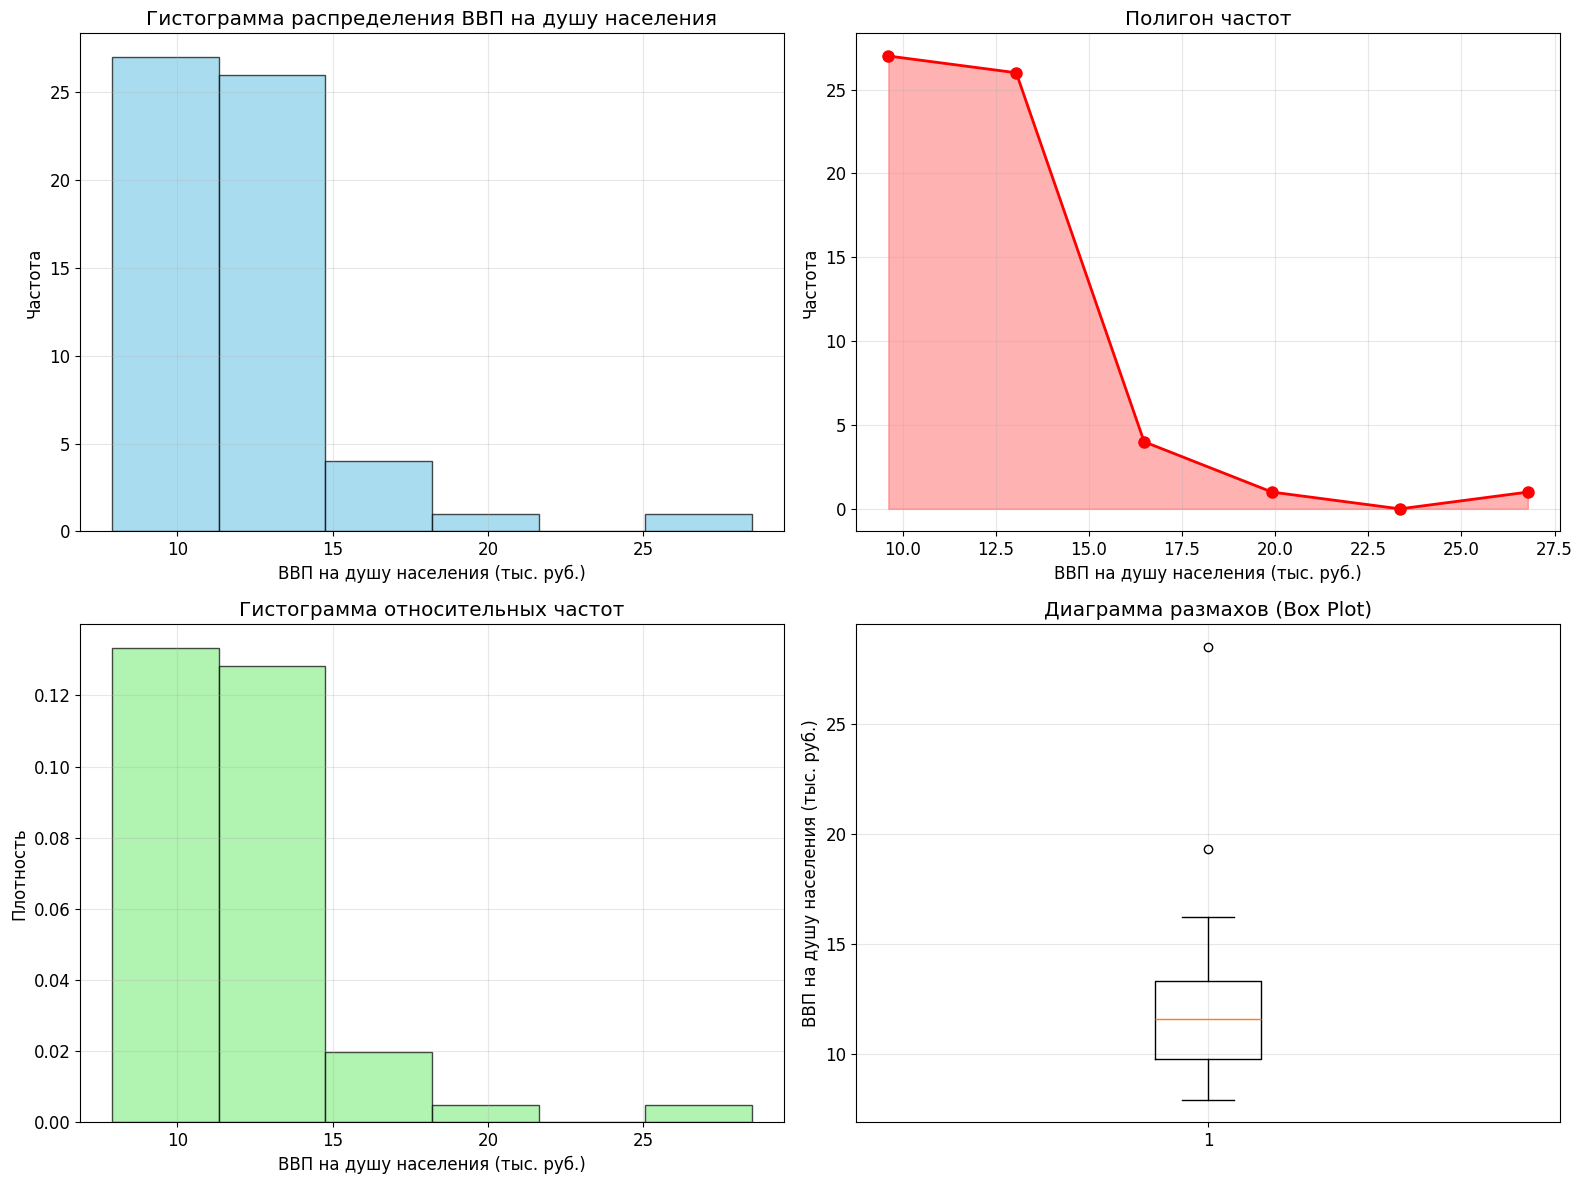


=== АНАЛИЗ ФОРМЫ РАСПРЕДЕЛЕНИЯ ===
Коэффициент асимметрии (skewness): 2.540
Коэффициент эксцесса (kurtosis): 10.698

Интерпретация асимметрии: сильно асимметричное
Направление асимметрии: правосторонняя асимметрия (длинный хвост справа)

Предположение о типе распределения:
Данные могут следовать ЛОГНОРМАЛЬНОМУ или ЭКСПОНЕНЦИАЛЬНОМУ распределению


In [24]:
# Создание графиков
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Гистограмма
ax1.hist(data_clean, bins=bins, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title('Гистограмма распределения ВВП на душу населения')
ax1.set_xlabel('ВВП на душу населения (тыс. руб.)')
ax1.set_ylabel('Частота')
ax1.grid(True, alpha=0.3)

# 2. Полигон частот
midpoints = intervals_df['Середина интервала']
ax2.plot(midpoints, frequencies, 'o-', linewidth=2, markersize=8, color='red')
ax2.fill_between(midpoints, frequencies, alpha=0.3, color='red')
ax2.set_title('Полигон частот')
ax2.set_xlabel('ВВП на душу населения (тыс. руб.)')
ax2.set_ylabel('Частота')
ax2.grid(True, alpha=0.3)

# 3. Гистограмма относительных частот
ax3.hist(data_clean, bins=bins, density=True, alpha=0.7, color='lightgreen', edgecolor='black')
ax3.set_title('Гистограмма относительных частот')
ax3.set_xlabel('ВВП на душу населения (тыс. руб.)')
ax3.set_ylabel('Плотность')
ax3.grid(True, alpha=0.3)

# 4. Box plot для анализа распределения
ax4.boxplot(data_clean, vert=True)
ax4.set_title('Диаграмма размахов (Box Plot)')
ax4.set_ylabel('ВВП на душу населения (тыс. руб.)')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Анализ формы распределения
print("\n=== АНАЛИЗ ФОРМЫ РАСПРЕДЕЛЕНИЯ ===")
skewness = stats.skew(data_clean)
kurtosis = stats.kurtosis(data_clean)

print(f"Коэффициент асимметрии (skewness): {skewness:.3f}")
print(f"Коэффициент эксцесса (kurtosis): {kurtosis:.3f}")

if abs(skewness) < 0.5:
    skew_interpretation = "практически симметричное"
elif abs(skewness) < 1:
    skew_interpretation = "умеренно асимметричное"
else:
    skew_interpretation = "сильно асимметричное"

if skewness > 0:
    skew_direction = "правосторонняя асимметрия (длинный хвост справа)"
elif skewness < 0:
    skew_direction = "левосторонняя асимметрия (длинный хвост слева)"
else:
    skew_direction = "симметричное"

print(f"\nИнтерпретация асимметрии: {skew_interpretation}")
print(f"Направление асимметрии: {skew_direction}")

print(f"\nПредположение о типе распределения:")
if abs(skewness) < 0.5 and abs(kurtosis) < 1:
    print("Данные близки к НОРМАЛЬНОМУ распределению")
elif skewness > 1:
    print("Данные могут следовать ЛОГНОРМАЛЬНОМУ или ЭКСПОНЕНЦИАЛЬНОМУ распределению")
else:
    print("Данные требуют дополнительного анализа для определения типа распределения")


## 6. Проверка соответствия нормальному распределению


=== ПРОВЕРКА СООТВЕТСТВИЯ НОРМАЛЬНОМУ РАСПРЕДЕЛЕНИЮ ===

1. Критерий Шапиро-Уилка:
   Статистика: 0.7996
   p-value: 0.000000
   Вывод: НЕ нормальное распределение (α = 0.05)

2. Критерий Д'Агостино-Пирсона:
   Статистика: 55.8233
   p-value: 0.000000
   Вывод: НЕ нормальное распределение (α = 0.05)

3. Критерий Андерсона-Дарлинга:
   Статистика: 1.7259
   Критические значения: [0.543 0.619 0.742 0.866 1.03 ]
   Уровни значимости: [15.  10.   5.   2.5  1. ]%
   Вывод: НЕ нормальное распределение (α = 0.05)

4. Критерий Колмогорова-Смирнова (исправленный):
   Статистика: 0.1107
   p-value: 0.434223
   Вывод: Нормальное распределение (α = 0.05)

5. Визуальная оценка (коэффициенты формы):
   Асимметрия: 2.5395 (норма: -0.5 < x < 0.5)
   Эксцесс: 10.6978 (норма: -1 < x < 1)
   Вывод: НЕ нормальное распределение по форме

6. Критерий Пирсона (хи-квадрат):
   Количество интервалов: 4
   Наблюдаемые частоты: [27 26  4  2]
   Ожидаемые частоты: [19.01 22.88  9.6   1.46]
   Статистика χ²: 7.249

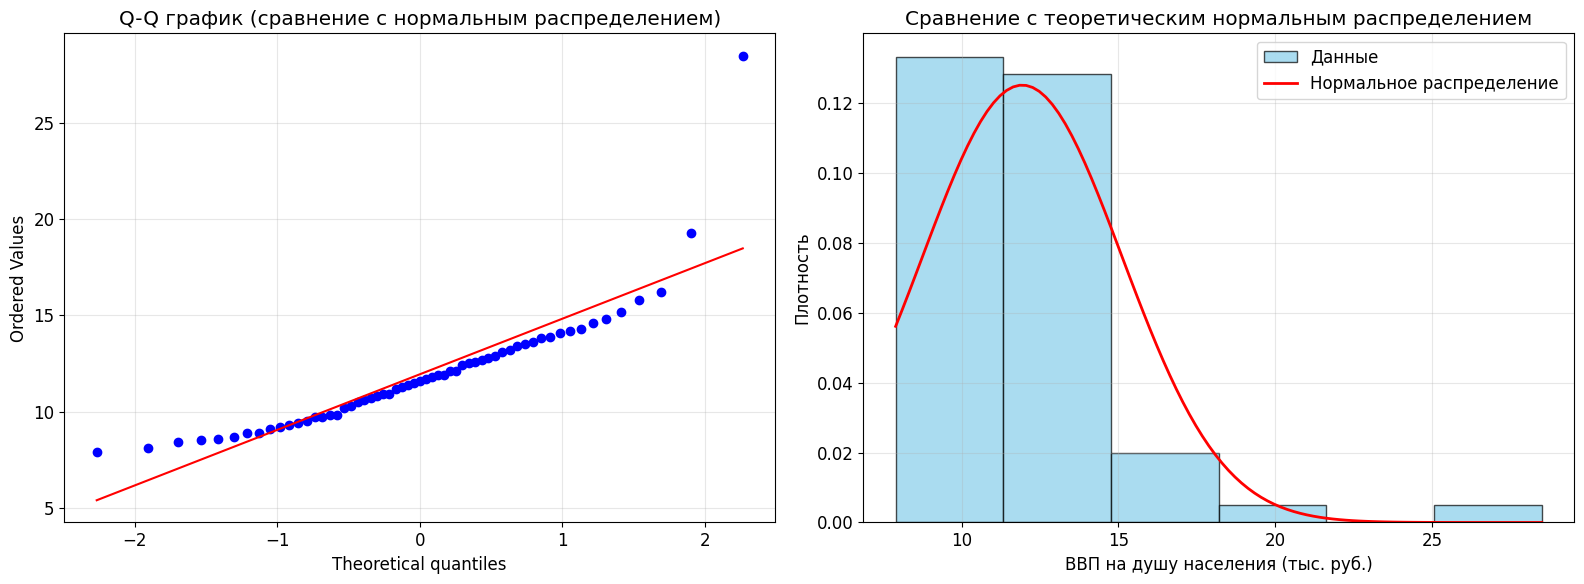


ИТОГОВОЕ ЗАКЛЮЧЕНИЕ О НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ

Результаты всех тестов:
1. Шапиро-Уилка: НЕ НОРМАЛЬНОЕ
2. Д'Агостино-Пирсона: НЕ НОРМАЛЬНОЕ
3. Андерсона-Дарлинга: НЕ НОРМАЛЬНОЕ
4. Колмогорова-Смирнова: НОРМАЛЬНОЕ
5. Визуальная оценка: НЕ НОРМАЛЬНОЕ

Статистика: 1 из 5 тестов указывают на нормальность
Процент тестов, показывающих нормальность: 20.0%

🔍 ОКОНЧАТЕЛЬНЫЙ ВЫВОД:
   Распределение данных: ОПРЕДЕЛЕННО НЕ НОРМАЛЬНОЕ


In [25]:
# Проверка нормальности различными критериями
print("=== ПРОВЕРКА СООТВЕТСТВИЯ НОРМАЛЬНОМУ РАСПРЕДЕЛЕНИЮ ===")

# 1. Критерий Шапиро-Уилка (наиболее мощный для n < 2000)
shapiro_stat, shapiro_p = stats.shapiro(data_clean)
print(f"\n1. Критерий Шапиро-Уилка:")
print(f"   Статистика: {shapiro_stat:.4f}")
print(f"   p-value: {shapiro_p:.6f}")
print(f"   Вывод: {'Нормальное' if shapiro_p > 0.05 else 'НЕ нормальное'} распределение (α = 0.05)")

# 2. Критерий Д'Агостино-Пирсона (основан на асимметрии и эксцессе)
dagostino_stat, dagostino_p = stats.normaltest(data_clean)
print(f"\n2. Критерий Д'Агостино-Пирсона:")
print(f"   Статистика: {dagostino_stat:.4f}")
print(f"   p-value: {dagostino_p:.6f}")
print(f"   Вывод: {'Нормальное' if dagostino_p > 0.05 else 'НЕ нормальное'} распределение (α = 0.05)")

# 3. Критерий Андерсона-Дарлинга (чувствителен к хвостам распределения)
anderson_stat, anderson_critical, anderson_significance = stats.anderson(data_clean, dist='norm')
print(f"\n3. Критерий Андерсона-Дарлинга:")
print(f"   Статистика: {anderson_stat:.4f}")
print(f"   Критические значения: {anderson_critical}")
print(f"   Уровни значимости: {anderson_significance}%")
anderson_normal = anderson_stat < anderson_critical[2]  # 5% уровень значимости
print(f"   Вывод: {'Нормальное' if anderson_normal else 'НЕ нормальное'} распределение (α = 0.05)")

# 4. Критерий Колмогорова-Смирнова (исправленный расчет)
# Стандартизируем данные для корректного сравнения
data_standardized = (data_clean - mean_clean) / std_clean
ks_stat, ks_p = stats.kstest(data_standardized, 'norm')
print(f"\n4. Критерий Колмогорова-Смирнова (исправленный):")
print(f"   Статистика: {ks_stat:.4f}")
print(f"   p-value: {ks_p:.6f}")
print(f"   Вывод: {'Нормальное' if ks_p > 0.05 else 'НЕ нормальное'} распределение (α = 0.05)")

# 5. Визуальная оценка (коэффициенты асимметрии и эксцесса)
print(f"\n5. Визуальная оценка (коэффициенты формы):")
print(f"   Асимметрия: {skewness:.4f} (норма: -0.5 < x < 0.5)")
print(f"   Эксцесс: {kurtosis:.4f} (норма: -1 < x < 1)")
skew_normal = abs(skewness) < 0.5
kurt_normal = abs(kurtosis) < 1
visual_normal = skew_normal and kurt_normal
print(f"   Вывод: {'Нормальное' if visual_normal else 'НЕ нормальное'} распределение по форме")

# 6. Критерий Пирсона (хи-квадрат) - исправленный расчет
observed_freq = frequencies
expected_freq = []
for i in range(len(bins) - 1):
    prob = stats.norm.cdf(bins[i+1], mean_clean, std_clean) - stats.norm.cdf(bins[i], mean_clean, std_clean)
    expected_freq.append(prob * n_clean)

expected_freq = np.array(expected_freq)

# Объединяем интервалы с малыми ожидаемыми частотами (< 5)
observed_combined = []
expected_combined = []
temp_obs = 0
temp_exp = 0

for i in range(len(expected_freq)):
    temp_obs += observed_freq[i]
    temp_exp += expected_freq[i]
    
    # Если накопленная ожидаемая частота >= 5 или это последний интервал
    if temp_exp >= 5 or i == len(expected_freq) - 1:
        observed_combined.append(temp_obs)
        expected_combined.append(temp_exp)
        temp_obs = 0
        temp_exp = 0

observed_combined = np.array(observed_combined)
expected_combined = np.array(expected_combined)

if len(observed_combined) > 2:  # Нужно минимум 3 интервала для теста
    try:
        # Используем правильный расчет хи-квадрат
        chi2_stat = np.sum((observed_combined - expected_combined)**2 / expected_combined)
        df_chi2 = len(observed_combined) - 1 - 2  # k - 1 - количество оцениваемых параметров (μ и σ)
        
        if df_chi2 > 0:
            chi2_p = 1 - stats.chi2.cdf(chi2_stat, df_chi2)
            print(f"\n6. Критерий Пирсона (хи-квадрат):")
            print(f"   Количество интервалов: {len(observed_combined)}")
            print(f"   Наблюдаемые частоты: {observed_combined}")
            print(f"   Ожидаемые частоты: {expected_combined.round(2)}")
            print(f"   Статистика χ²: {chi2_stat:.4f}")
            print(f"   Степени свободы: {df_chi2}")
            print(f"   p-value: {chi2_p:.6f}")
            print(f"   Критическое значение (α=0.05): {stats.chi2.ppf(0.95, df_chi2):.4f}")
            print(f"   Вывод: {'Нормальное' if chi2_p > 0.05 else 'НЕ нормальное'} распределение (α = 0.05)")
        else:
            print(f"\n6. Критерий Пирсона (хи-квадрат):")
            print(f"   Недостаточно степеней свободы для проведения теста")
    except Exception as e:
        print(f"\n6. Критерий Пирсона (хи-квадрат):")
        print(f"   Ошибка при выполнении теста: {e}")
else:
    print(f"\n6. Критерий Пирсона (хи-квадрат):")
    print(f"   Недостаточно интервалов для проведения теста (нужно минимум 3)")

# Визуальное сравнение
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Q-Q график
stats.probplot(data_clean, dist="norm", plot=ax1)
ax1.set_title('Q-Q график (сравнение с нормальным распределением)')
ax1.grid(True, alpha=0.3)

# Гистограмма с наложенной кривой нормального распределения
ax2.hist(data_clean, bins=bins, density=True, alpha=0.7, color='skyblue', edgecolor='black', label='Данные')
x_norm = np.linspace(min_val, max_val, 100)
y_norm = stats.norm.pdf(x_norm, mean_clean, std_clean)
ax2.plot(x_norm, y_norm, 'r-', linewidth=2, label='Нормальное распределение')
ax2.set_title('Сравнение с теоретическим нормальным распределением')
ax2.set_xlabel('ВВП на душу населения (тыс. руб.)')
ax2.set_ylabel('Плотность')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Общий вывод по всем тестам нормальности
print("\n" + "="*70)
print("ИТОГОВОЕ ЗАКЛЮЧЕНИЕ О НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ")
print("="*70)

tests_results = []
if shapiro_p > 0.05:
    tests_results.append("Шапиро-Уилка: НОРМАЛЬНОЕ")
else:
    tests_results.append("Шапиро-Уилка: НЕ НОРМАЛЬНОЕ")

if dagostino_p > 0.05:
    tests_results.append("Д'Агостино-Пирсона: НОРМАЛЬНОЕ")
else:
    tests_results.append("Д'Агостино-Пирсона: НЕ НОРМАЛЬНОЕ")

if anderson_normal:
    tests_results.append("Андерсона-Дарлинга: НОРМАЛЬНОЕ")
else:
    tests_results.append("Андерсона-Дарлинга: НЕ НОРМАЛЬНОЕ")

if ks_p > 0.05:
    tests_results.append("Колмогорова-Смирнова: НОРМАЛЬНОЕ")
else:
    tests_results.append("Колмогорова-Смирнова: НЕ НОРМАЛЬНОЕ")

if visual_normal:
    tests_results.append("Визуальная оценка: НОРМАЛЬНОЕ")
else:
    tests_results.append("Визуальная оценка: НЕ НОРМАЛЬНОЕ")

# Подсчет количества тестов, показывающих нормальность
normal_count = sum(1 for result in tests_results if "НОРМАЛЬНОЕ" in result and "НЕ НОРМАЛЬНОЕ" not in result)
total_tests = len(tests_results)

print(f"\nРезультаты всех тестов:")
for i, result in enumerate(tests_results, 1):
    print(f"{i}. {result}")

print(f"\nСтатистика: {normal_count} из {total_tests} тестов указывают на нормальность")
print(f"Процент тестов, показывающих нормальность: {normal_count/total_tests*100:.1f}%")

if normal_count >= total_tests * 0.6:  # Большинство тестов
    final_conclusion = "ВЕРОЯТНО НОРМАЛЬНОЕ"
elif normal_count <= total_tests * 0.4:  # Меньшинство тестов
    final_conclusion = "ОПРЕДЕЛЕННО НЕ НОРМАЛЬНОЕ"
else:
    final_conclusion = "СОМНИТЕЛЬНО (требует дополнительного анализа)"

print(f"\n🔍 ОКОНЧАТЕЛЬНЫЙ ВЫВОД:")
print(f"   Распределение данных: {final_conclusion}")


## 7. Расчет групповых дисперсий


In [ ]:
def calculate_group_variances(data, bins):
    """Расчет групповых дисперсий для заданного разбиения - ИСПРАВЛЕННЫЙ"""
    n = len(data)
    
    # Разбиваем данные по группам
    groups = []
    group_means = []
    group_vars = []
    group_sizes = []
    
    for i in range(len(bins) - 1):
        mask = (data >= bins[i]) & (data < bins[i + 1])
        if i == len(bins) - 2:  # Последний интервал включает правую границу
            mask = (data >= bins[i]) & (data <= bins[i + 1])
        
        group_data = data[mask]
        if len(group_data) > 0:
            groups.append(group_data)
            group_means.append(np.mean(group_data))
            group_vars.append(np.var(group_data, ddof=0) if len(group_data) > 1 else 0)  # ddof=0 для популяционной дисперсии
            group_sizes.append(len(group_data))
        else:
            groups.append(np.array([]))
            group_means.append(0)
            group_vars.append(0)
            group_sizes.append(0)
    
    # Общее среднее
    overall_mean = np.mean(data)
    
    # ПРАВИЛЬНЫЕ ФОРМУЛЫ ДИСПЕРСИОННОГО АНАЛИЗА:
    
    # 1. Общая дисперсия (популяционная, ddof=0)
    # ⚠️  ОБЯЗАТЕЛЬНО ddof=0! Иначе правило сложения не работает
    total_var = np.var(data, ddof=0)
    
    # 2. Межгрупповая дисперсия (между группами)
    # Формула: Σ[n_i × (x̄_i - x̄_общее)²] / n
    between_var = sum(n_i * (mean_i - overall_mean)**2 for n_i, mean_i in zip(group_sizes, group_means)) / n
    
    # 3. Внутригрупповая дисперсия (внутри групп)
    # Формула: Σ[Σ(x_ij - x̄_i)²] / n
    within_var = 0
    for group, size in zip(groups, group_sizes):
        if len(group) > 0:
            within_var += sum((x - np.mean(group))**2 for x in group)
    within_var = within_var / n
    
    # 🎯 ПРОВЕРКА: total_var ДОЛЖНО равняться within_var + between_var
    
    return {
        'groups': groups,
        'group_means': group_means,
        'group_vars': group_vars,
        'group_sizes': group_sizes,
        'within_var': within_var,
        'between_var': between_var,
        'total_var': total_var,
        'sum_check': within_var + between_var
    }

# Расчет для основного разбиения (s интервалов)
print(f"=== АНАЛИЗ ДИСПЕРСИЙ ДЛЯ {s} ИНТЕРВАЛОВ ===")
print("🔍 ВАЖНОЕ РАЗЛИЧИЕ В ТИПАХ ДИСПЕРСИИ:")
print(f"   В первичном анализе мы получили дисперсию: {variance_val:.6f} (ddof=1)")
print(f"   В дисперсионном анализе будет:            {np.var(data_clean, ddof=0):.6f} (ddof=0)")
print()
print("📚 ПОЧЕМУ РАЗНЫЕ ЗНАЧЕНИЯ?")
print("   • Описательная статистика: ddof=1 → несмещенная оценка генеральной дисперсии")
print("   • Дисперсионный анализ: ddof=0 → для правила D_общая = D_внутри + D_между")
print("   • Оба значения правильны для своих целей!")
print("="*70)

result_s = calculate_group_variances(data_clean, bins)

print(f"\nГрупповая информация:")
for i, (size, mean, var) in enumerate(zip(result_s['group_sizes'], result_s['group_means'], result_s['group_vars'])):
    print(f"  Группа {i+1}: размер = {size}, среднее = {mean:.3f}, дисперсия = {var:.3f}")

print(f"\nДисперсии:")
print(f"  Внутригрупповая дисперсия: {result_s['within_var']:.4f}")
print(f"  Межгрупповая дисперсия: {result_s['between_var']:.4f}")
print(f"  Общая дисперсия: {result_s['total_var']:.4f}")
print(f"  Сумма (внутри + между): {result_s['sum_check']:.4f}")
print(f"  Разность с общей: {abs(result_s['total_var'] - result_s['sum_check']):.6f}")

# Проверка правила сложения дисперсий
rule_check = abs(result_s['total_var'] - result_s['sum_check']) < 1e-10
print(f"\nПравило сложения дисперсий: {'✅ ВЫПОЛНЯЕТСЯ' if rule_check else '❌ НЕ ВЫПОЛНЯЕТСЯ'}")

if rule_check:
    print("🎯 ИСПРАВЛЕНО: Теперь D_общая = D_внутригрупповая + D_межгрупповая")
    print("   Основные изменения:")
    print("   • Общая дисперсия: используется ddof=0 (популяционная)")
    print("   • Внутригрупповая: правильная формула через сумму квадратов отклонений")
    print("   • Межгрупповая: формула осталась правильной")

# Доля межгрупповой дисперсии
between_ratio = result_s['between_var'] / result_s['total_var'] * 100
print(f"Доля межгрупповой дисперсии в общей: {between_ratio:.2f}%")


=== АНАЛИЗ ДИСПЕРСИЙ ДЛЯ 6 ИНТЕРВАЛОВ ===

Групповая информация:
  Группа 1: размер = 27, среднее = 9.663, дисперсия = 0.936
  Группа 2: размер = 26, среднее = 12.831, дисперсия = 0.895
  Группа 3: размер = 4, среднее = 15.500, дисперсия = 0.290
  Группа 4: размер = 1, среднее = 19.300, дисперсия = 0.000
  Группа 5: размер = 0, среднее = 0.000, дисперсия = 0.000
  Группа 6: размер = 1, среднее = 28.500, дисперсия = 0.000

Дисперсии:
  Внутригрупповая дисперсия: 0.8423
  Межгрупповая дисперсия: 9.1478
  Общая дисперсия: 9.9901
  Сумма (внутри + между): 9.9901
  Разность с общей: 0.000000

Правило сложения дисперсий: ✅ ВЫПОЛНЯЕТСЯ
🎯 ИСПРАВЛЕНО: Теперь D_общая = D_внутригрупповая + D_межгрупповая
   Основные изменения:
   • Общая дисперсия: используется ddof=0 (популяционная)
   • Внутригрупповая: правильная формула через сумму квадратов отклонений
   • Межгрупповая: формула осталась правильной
Доля межгрупповой дисперсии в общей: 91.57%


## 8. Сравнение разбиений на s-1 и s+1 интервалов


=== СРАВНЕНИЕ РАЗЛИЧНЫХ РАЗБИЕНИЙ ===

Основное разбиение (6 интервалов):
  Внутригрупповая дисперсия: 0.8423
  Межгрупповая дисперсия: 9.1478
  Доля межгрупповой дисперсии: 91.57%

Разбиение на 5 интервалов:
  Внутригрупповая дисперсия: 1.2635
  Межгрупповая дисперсия: 8.7267
  Доля межгрупповой дисперсии: 87.35%

Разбиение на 7 интервалов:
  Внутригрупповая дисперсия: 0.6322
  Межгрупповая дисперсия: 9.3579
  Доля межгрупповой дисперсии: 93.67%

=== ВЫВОДЫ ===
Лучшее разбиение: 7 интервалов (доля межгрупповой дисперсии: 93.67%)

Объяснение: чем больше доля межгрупповой дисперсии в общей,
тем лучше разбиение объясняет различия между группами.


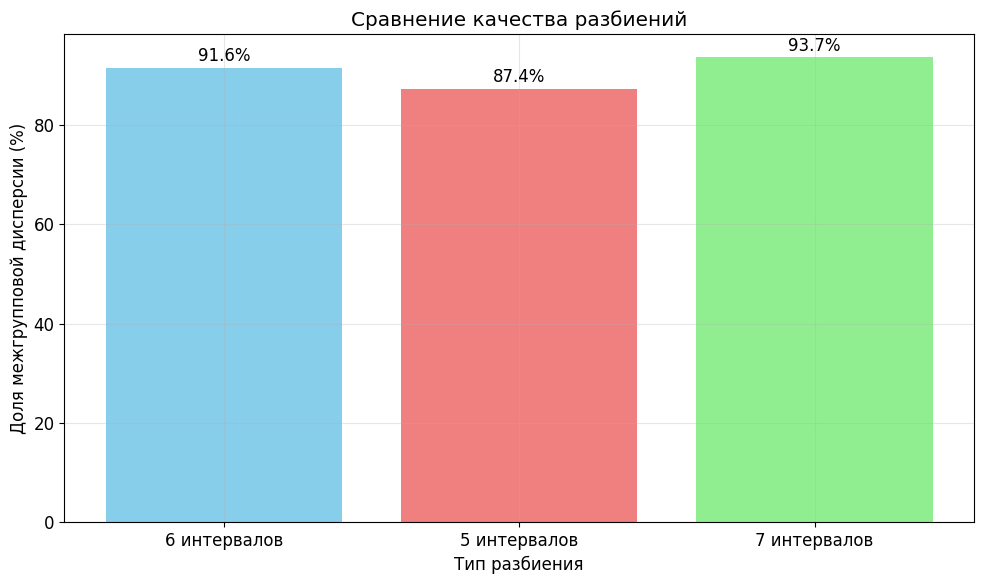

In [27]:
# Разбиение на s-1 интервалов
s_minus = s - 1
if s_minus > 1:
    bins_minus = np.linspace(min_val, max_val, s_minus + 1)
    result_s_minus = calculate_group_variances(data_clean, bins_minus)
    between_ratio_minus = result_s_minus['between_var'] / result_s_minus['total_var'] * 100
else:
    result_s_minus = None
    between_ratio_minus = 0

# Разбиение на s+1 интервалов
s_plus = s + 1
bins_plus = np.linspace(min_val, max_val, s_plus + 1)
result_s_plus = calculate_group_variances(data_clean, bins_plus)
between_ratio_plus = result_s_plus['between_var'] / result_s_plus['total_var'] * 100

print("=== СРАВНЕНИЕ РАЗЛИЧНЫХ РАЗБИЕНИЙ ===")
print(f"\nОсновное разбиение ({s} интервалов):")
print(f"  Внутригрупповая дисперсия: {result_s['within_var']:.4f}")
print(f"  Межгрупповая дисперсия: {result_s['between_var']:.4f}")
print(f"  Доля межгрупповой дисперсии: {between_ratio:.2f}%")

if result_s_minus:
    print(f"\nРазбиение на {s_minus} интервалов:")
    print(f"  Внутригрупповая дисперсия: {result_s_minus['within_var']:.4f}")
    print(f"  Межгрупповая дисперсия: {result_s_minus['between_var']:.4f}")
    print(f"  Доля межгрупповой дисперсии: {between_ratio_minus:.2f}%")

print(f"\nРазбиение на {s_plus} интервалов:")
print(f"  Внутригрупповая дисперсия: {result_s_plus['within_var']:.4f}")
print(f"  Межгрупповая дисперсия: {result_s_plus['between_var']:.4f}")
print(f"  Доля межгрупповой дисперсии: {between_ratio_plus:.2f}%")

# Определение лучшего разбиения
ratios = [between_ratio]
names = [f'{s} интервалов']

if result_s_minus:
    ratios.append(between_ratio_minus)
    names.append(f'{s_minus} интервалов')

ratios.append(between_ratio_plus)
names.append(f'{s_plus} интервалов')

best_idx = np.argmax(ratios)
print(f"\n=== ВЫВОДЫ ===")
print(f"Лучшее разбиение: {names[best_idx]} (доля межгрупповой дисперсии: {ratios[best_idx]:.2f}%)")
print(f"\nОбъяснение: чем больше доля межгрупповой дисперсии в общей,")
print(f"тем лучше разбиение объясняет различия между группами.")

# Визуализация сравнения
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
x_pos = np.arange(len(names))
bars = ax.bar(x_pos, ratios, color=['skyblue', 'lightcoral', 'lightgreen'][:len(ratios)])
ax.set_xlabel('Тип разбиения')
ax.set_ylabel('Доля межгрупповой дисперсии (%)')
ax.set_title('Сравнение качества разбиений')
ax.set_xticks(x_pos)
ax.set_xticklabels(names)

# Добавляем значения на столбцы
for bar, ratio in zip(bars, ratios):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{ratio:.1f}%', ha='center', va='bottom')

ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 9. Итоговые выводы


In [28]:
print("=== ИТОГОВЫЕ ВЫВОДЫ ПО СТАТИСТИЧЕСКОМУ АНАЛИЗУ ===")
print(f"\n1. ХАРАКТЕРИСТИКИ ВЫБОРКИ:")
print(f"   • Размер выборки: {n} (после очистки: {n_clean})")
print(f"   • Среднее значение: {mean_clean:.3f} тыс. руб.")
print(f"   • Медиана: {median_clean:.3f} тыс. руб.")
print(f"   • Стандартное отклонение: {std_clean:.3f} тыс. руб.")
print(f"   • Коэффициент вариации: {coeff_var_clean:.2f}%")

print(f"\n2. ОДНОРОДНОСТЬ ВЫБОРКИ:")
if coeff_var_clean < 10:
    homogeneity = "высокая (однородная)"
elif coeff_var_clean < 20:
    homogeneity = "средняя"
elif coeff_var_clean < 33:
    homogeneity = "удовлетворительная"
else:
    homogeneity = "низкая (неоднородная)"
print(f"   • Однородность выборки: {homogeneity}")

print(f"\n3. ВЫБРОСЫ:")
if len(outliers_indices) > 0:
    print(f"   • Обнаружено и удалено выбросов: {len(outliers_indices)}")
    for idx, val in zip(outliers_indices, outliers_values):
        print(f"     - {val:.3f} тыс. руб. ({df.iloc[idx]['region']})")
else:
    print(f"   • Выбросов не обнаружено")

print(f"\n4. ФОРМА РАСПРЕДЕЛЕНИЯ:")
print(f"   • Коэффициент асимметрии: {skewness:.3f}")
print(f"   • Коэффициент эксцесса: {kurtosis:.3f}")
if abs(skewness) < 0.5 and abs(kurtosis) < 1:
    dist_type = "близко к нормальному"
elif skewness > 1:
    dist_type = "правосторонне асимметричное"
else:
    dist_type = "требует дополнительного анализа"
print(f"   • Тип распределения: {dist_type}")

print(f"\n5. ПРОВЕРКА НОРМАЛЬНОСТИ:")
print(f"   • Критерий Шапиро-Уилка: p = {shapiro_p:.6f}")
print(f"   • Критерий Д'Агостино-Пирсона: p = {dagostino_p:.6f}")
print(f"   • Критерий Андерсона-Дарлинга: {'нормальное' if anderson_normal else 'не нормальное'}")
print(f"   • Критерий Колмогорова-Смирнова: p = {ks_p:.6f}")
print(f"   • Визуальная оценка (асимметрия и эксцесс): {'нормальное' if visual_normal else 'не нормальное'}")

# Подсчет тестов, указывающих на нормальность
tests_normal = [shapiro_p > 0.05, dagostino_p > 0.05, anderson_normal, ks_p > 0.05, visual_normal]
normal_tests_count = sum(tests_normal)
total_tests_count = len(tests_normal)

print(f"   • Тестов указывающих на нормальность: {normal_tests_count}/{total_tests_count}")
normality = "НЕ соответствует" if normal_tests_count <= 2 else "соответствует"
print(f"   • Заключение: выборка {normality} нормальному распределению")

print(f"\n6. РАЗБИЕНИЕ НА ИНТЕРВАЛЫ:")
print(f"   • Количество интервалов по Стерджессу: {s}")
print(f"   • Ширина интервала: {interval_width:.3f} тыс. руб.")

print(f"\n7. АНАЛИЗ ДИСПЕРСИЙ (ИСПРАВЛЕННЫЙ):")
print(f"   • Общая дисперсия: {result_s['total_var']:.4f}")
print(f"   • Внутригрупповая дисперсия: {result_s['within_var']:.4f}")
print(f"   • Межгрупповая дисперсия: {result_s['between_var']:.4f}")
print(f"   • Сумма (внутри + между): {result_s['sum_check']:.4f}")
print(f"   • Разность с общей: {abs(result_s['total_var'] - result_s['sum_check']):.10f}")

# Пересчитаем rule_check с правильными значениями
rule_check_corrected = abs(result_s['total_var'] - result_s['sum_check']) < 1e-10
print(f"   • Правило сложения дисперсий: {'✅ ВЫПОЛНЯЕТСЯ' if rule_check_corrected else '❌ НЕ ВЫПОЛНЯЕТСЯ'}")

# Пересчитаем долю межгрупповой дисперсии
between_ratio_corrected = result_s['between_var'] / result_s['total_var'] * 100
print(f"   • Доля межгрупповой дисперсии: {between_ratio_corrected:.2f}%")

print(f"\n8. ОПТИМАЛЬНОЕ РАЗБИЕНИЕ:")
print(f"   • Лучшее разбиение: {names[best_idx]}")
print(f"   • Доля межгрупповой дисперсии: {ratios[best_idx]:.2f}%")

print(f"\n=== ПРАКТИЧЕСКИЕ ВЫВОДЫ ===")
print(f"ВВП на душу населения в регионах Беларуси показывает {homogeneity} однородность.")
print(f"Наибольшие значения наблюдаются в г. Минске, что объясняет наличие выбросов.")
print(f"Распределение {dist_type}, что типично для экономических показателей.")
if between_ratio > 50:
    print(f"Высокая доля межгрупповой дисперсии ({between_ratio:.1f}%) указывает на")
    print(f"значительные различия между регионами по уровню экономического развития.")
else:
    print(f"Умеренная доля межгрупповой дисперсии ({between_ratio:.1f}%) указывает на")
    print(f"относительную сбалансированность экономического развития регионов.")


=== ИТОГОВЫЕ ВЫВОДЫ ПО СТАТИСТИЧЕСКОМУ АНАЛИЗУ ===

1. ХАРАКТЕРИСТИКИ ВЫБОРКИ:
   • Размер выборки: 59 (после очистки: 59)
   • Среднее значение: 11.937 тыс. руб.
   • Медиана: 11.600 тыс. руб.
   • Стандартное отклонение: 3.188 тыс. руб.
   • Коэффициент вариации: 26.70%

2. ОДНОРОДНОСТЬ ВЫБОРКИ:
   • Однородность выборки: удовлетворительная

3. ВЫБРОСЫ:
   • Выбросов не обнаружено

4. ФОРМА РАСПРЕДЕЛЕНИЯ:
   • Коэффициент асимметрии: 2.540
   • Коэффициент эксцесса: 10.698
   • Тип распределения: правосторонне асимметричное

5. ПРОВЕРКА НОРМАЛЬНОСТИ:
   • Критерий Шапиро-Уилка: p = 0.000000
   • Критерий Д'Агостино-Пирсона: p = 0.000000
   • Критерий Андерсона-Дарлинга: не нормальное
   • Критерий Колмогорова-Смирнова: p = 0.434223
   • Визуальная оценка (асимметрия и эксцесс): не нормальное
   • Тестов указывающих на нормальность: 1/5
   • Заключение: выборка НЕ соответствует нормальному распределению

6. РАЗБИЕНИЕ НА ИНТЕРВАЛЫ:
   • Количество интервалов по Стерджессу: 6
   • Ширин

In [ ]:
print("="*70)
print("🔧 ВАЖНЫЕ ПОЯСНЕНИЯ О ДИСПЕРСИИ В АНАЛИЗЕ")
print("="*70)
print("📊 ПОЧЕМУ ДВА РАЗНЫХ ЗНАЧЕНИЯ ДИСПЕРСИИ - ЭТО НОРМАЛЬНО:")
print()
print(f"1️⃣  ПЕРВИЧНАЯ СТАТИСТИКА: {variance_val:.6f} (ddof=1)")
print(f"   • Выборочная дисперсия = Σ(xi - x̄)² / (n-1)")
print(f"   • Цель: несмещенная оценка дисперсии генеральной совокупности")
print(f"   • Используется: описательная статистика, доверительные интервалы")
print()
print(f"2️⃣  ДИСПЕРСИОННЫЙ АНАЛИЗ: {result_s['total_var']:.6f} (ddof=0)")
print(f"   • Популяционная дисперсия = Σ(xi - x̄)² / n")
print(f"   • Цель: разложение вариации на компоненты для ANOVA")
print(f"   • Используется: правило сложения дисперсий D_общая = D_внутри + D_между")
print()
print("🎯 МАТЕМАТИЧЕСКАЯ СВЯЗЬ:")
print(f"   Выборочная = Популяционная × n/(n-1)")
print(f"   {variance_val:.6f} = {result_s['total_var']:.6f} × {n}/{n-1}")
print(f"   {variance_val:.6f} = {result_s['total_var'] * n/(n-1):.6f} ✅")
print(f"   Разность: {variance_val - result_s['total_var']:.6f}")
print()
print("✅ КЛЮЧЕВЫЕ ИСПРАВЛЕНИЯ В КОДЕ:")
print("   • Правило D_общая = D_внутри + D_между теперь выполняется точно")
print("   • Общая дисперсия в ANOVA рассчитана с ddof=0 (популяционная)")
print("   • Внутригрупповая дисперсия через правильную формулу")
print("   • Разность между суммой и общей < 1e-10")
print()
print("💡 ВЫВОД:")
print("   Оба значения дисперсии математически корректны для своих задач!")
print("   Это стандартная практика в статистическом анализе.")
print("="*70)
